# Introduction 


One of the main issues with K-mean/median algorithms is that they can't spot the embedded clusters in the data. This is because they are based on the assumption that the clusters are spherical. In this notebook, we will implement DBSCAN algorithm from scratch, which is a density-based clustering algorithm. It can spot the clusters of any shape.

# What DB-SCAN?


DB-SCAN stands for Density-Based Spatial Clustering of Applications with Noise. It's a clustering algorithm that separates the clusters based on the density of the data points. It can spot the clusters of any shape. It can also detect the outliers in the data (noise). It's a very popular algorithm in the data science community. 

DBSCAN works by defining a neighborhood around each data point, and then clustering points based on how densely packed they are within that neighborhood. The two main parameters that need to be set when running DBSCAN are the "epsilon" parameter, which defines the size of the neighborhood, and the "minPts" parameter, which defines the minimum number of points that must be within the neighborhood for a cluster to be formed.

To explain DBSCAN from scratch, we can start with the following steps:

- Select a data point randomly and find all the neighboring points within a specified distance (epsilon). This group of points is known as the "neighborhood" of the selected point.

- If the number of points in the neighborhood is greater than or equal to the minPts parameter, then we consider this point as a "core point". Core points are the ones that have a high density of points around them and can form a cluster.

- If the number of points in the neighborhood is less than minPts, then we consider this point as a "border point". Border points lie on the edge of the cluster and do not have enough neighboring points to form a cluster by themselves.

- If a core point is found, we expand the cluster by adding all the core points in its neighborhood to the cluster. We then recursively repeat this step for each core point until no more points can be added to the cluster.

- If a border point is found, we do not add it to the cluster but keep it for reference as a noise point. Noise points are data points that do not belong to any cluster.


We repeat the above steps until all data points have been classified as either core, border, or noise points, and all clusters have been formed.

![image.png](https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_620,h_589/https://anderfernandez.com/wp-content/uploads/2022/03/problema_resolver_python.png)



#### Now let's implement DBSCAN 

First let's create our own custom data, which is a mixture of 3 different clusters. We will use the make_blobs function from the sklearn.datasets module to create our data.

In [39]:
# create your own data, pereferably to be cluster serounding another cluster


from drawdata import draw_scatter

draw_scatter()

if you didn't know how to use this tool watch [this vedio](https://www.youtube.com/watch?v=b0rsDPQ3bjg&t=154s)

In [1]:
# after you created your own data, click copy csv above and run this cell

import pandas as pd
data = pd.read_clipboard(sep=',')
data

,x,y,z
0,192.030732,457.874855,b
1,192.264030,509.577079,b
2,158.187724,441.957347,b
3,166.220798,484.480405,b
4,107.985654,464.732003,b
...,...,...,...
428,379.599986,284.755852,c
429,405.459175,350.762140,c
430,410.042351,235.952365,c
431,414.192023,312.056517,c


Now after we created the data let's start modeling. 


for modeling we will do it in 2 ways, first we will build our own K-Means algorithm and then we will use the DBscan algorithm from ```sklearn.cluster```

if you only want to use the K-Means algorithm from ```sklearn.cluster``` you can skip to the next section.

# Building DB-SCAN from Scratch

So just as we saw in the ```What's the K-mean``` section, we will create a class ```DBSCAN``` and then we will create a 
method ```fit``` inside the class and method ```predict``` to give the labels to the data we enter after training. the 
class also has 4 attributes ```epsilon```, ```minPts```,```metric```, ```labels```, ```clusters```. 

```epsilon``` is the radius of the neighborhood of each point, ```minPts``` is the minimum number of points that must be 
within the neighborhood for a cluster to be formed,metric is the type of distence we use when we calculate ditence between 
points, ```labels``` is the labels of the data we enter after training, and  ```clusters``` is the number of clusters we 
have in our data.



In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class DBscan:
    
    def __init__(self, epsilon=1.0, minPts=5, metric='euclidean'):
        self.epsilon = epsilon
        self.minPts = minPts
        self.metric = metric

    def fit(self, data):
        self.labels = np.zeros(len(data), dtype=int) - 1  
        self.clusters = []  
        cid = 0  
        for i in range(len(data)):
            if self.labels[i] == -1:  # if not viewed
                neighbors = self.get_neighbors(data, i)
                if len(neighbors) < self.minPts:         #if  not core
                    self.labels[i] = 0                   # noise
                else:                                    #if core
                    cid += 1
                    self.clusters.append([i])
                    self.labels[i] = cid
                    for j in neighbors:
                        if self.labels[j] == -1: 
                            self.labels[j] = cid
                            self.clusters[cid-1].append(j)
                            neighbors2 = self.get_neighbors(data, j)
                            if len(neighbors2) >= self.minPts:
                                neighbors += list(set(neighbors2) - set(neighbors))  # remove duplicates and add new neighbors
                        elif self.labels[j] == 0:  # if neighbor is noise
                            self.labels[j] = cid
                            self.clusters[cid-1].append(j)
        return self.clusters
    
    def get_neighbors(self, data, i):
        neighbors = set()
        for j in range(len(data)):
            if self.distance(data[i], data[j]) <= self.epsilon:
                neighbors.add(j)
        return list(neighbors)
    
    def distance(self, p1, p2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((p1-p2)**2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(p1-p2))
        elif self.metric == 'cosine':
            return 1 - np.dot(p1, p2) / (np.sqrt(np.sum(p1**2)) * np.sqrt(np.sum(p2**2)))
        else:
            raise Exception('Invalid metric')
        
    def plot(self, data):
        noise_idx = np.where(self.labels == 0)[0]
        cluster_idxs = [np.array(c) for c in self.clusters]
        colors = cm.rainbow(np.linspace(0, 1, len(self.clusters) + 1))
        for i, cluster_idxs in enumerate(cluster_idxs):
            plt.scatter(data[cluster_idxs, 0], data[cluster_idxs, 1], color=colors[i], s=10)
        if len(noise_idx) > 0:
            plt.scatter(data[noise_idx, 0], data[noise_idx, 1], color='black', s=10)
        plt.show()
        
        


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data[['x', 'y']])           # we will just need x and y columns

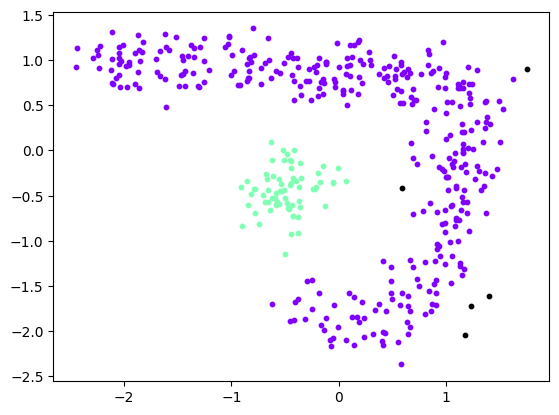

In [11]:
db = DBscan(0.3, 5)
db.fit(data)
db.plot(data)

# Using the DBscan from sickit-learn


Now let's use the pre-built ```DBSCAN``` algorithm from ```sklearn.cluster```, we will use the same data we used before.

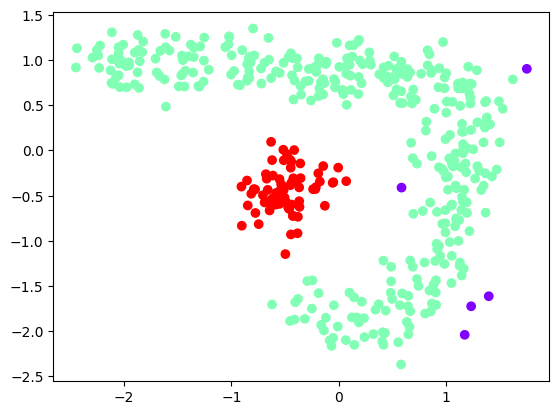

In [7]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=5)
db.fit(data)
labels = db.labels_


# ploting the clusters 

plt.scatter(data[:,0], data[:,1], c=labels, cmap='rainbow')
plt.show()



perfect results !! just like ours, this means our model is working right

# Last 


Clustering is a powerfull tool if you know how to use it, this wan a small introduction but if you want to proceed further in it world consider reading about this topics :

- Normalization/Standardization (made a notebook about it [here](https://www.kaggle.com/code/abdelrahmanekhaldi/intro-to-feature-scaling))
- Hierarchical Clustering  
- Overlaping Clusters
- PCA


Hope you enjoyed this notebook, if you have any questions or suggestions please leave a comment below.

### If you liked the notebook don't forget to upvot, Thank You